# Overfitting & Underfitting


In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_seq(seq, dimension=10000):
    results = np.zeros((len(seq), dimension))
    for i, seq in enumerate(seq):
        results[i, seq] = 1.   
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

# 과대적합

## 네트워크 크기 축소

imdb 의 영화리뷰 분류문제의 원래 네트워크

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

더 작은 네트워크 

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 38ms/step - loss: 0.5896 - acc: 0.6844 - val_loss: 0.3685 - val_acc: 0.8749
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2981 - acc: 0.9069 - val_loss: 0.2950 - val_acc: 0.8866
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2195 - acc: 0.9268 - val_loss: 0.2822 - val_acc: 0.8890
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1667 - acc: 0.9451 - val_loss: 0.3024 - val_acc: 0.8812
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1454 - acc: 0.9509 - val_loss: 0.3072 - val_acc: 0.8822
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1231 - acc: 0.9602 - val_loss: 0.3361 - val_acc: 0.8754
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1089 - acc: 0.9641 - val_loss: 0.3485 - val_acc: 0.8748
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.0963 - a

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.6100 - acc: 0.7177 - val_loss: 0.4406 - val_acc: 0.8676
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3775 - acc: 0.8955 - val_loss: 0.3360 - val_acc: 0.8812
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2743 - acc: 0.9138 - val_loss: 0.2950 - val_acc: 0.8872
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2155 - acc: 0.9288 - val_loss: 0.2828 - val_acc: 0.8880
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1808 - acc: 0.9396 - val_loss: 0.2809 - val_acc: 0.8882
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1572 - acc: 0.9482 - val_loss: 0.2909 - val_acc: 0.8843
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1404 - acc: 0.9557 - val_loss: 0.3029 - val_acc: 0.8820
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1268 - a

In [ ]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

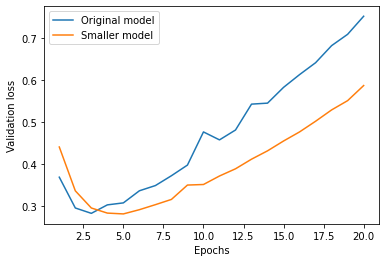

In [ ]:
plt.plot(epochs, original_val_loss, label='Original model')
plt.plot(epochs, smaller_model_val_loss, label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

과도하게 큰 용량을 가진 네트워크 

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 29s 594ms/step - loss: 0.8702 - acc: 0.7262 - val_loss: 0.2935 - val_acc: 0.8796
Epoch 2/20
49/49 [==============================] - 29s 589ms/step - loss: 0.2356 - acc: 0.9036 - val_loss: 0.2842 - val_acc: 0.8880
Epoch 3/20
49/49 [==============================] - 29s 588ms/step - loss: 0.1230 - acc: 0.9558 - val_loss: 0.3669 - val_acc: 0.8787
Epoch 4/20
49/49 [==============================] - 29s 591ms/step - loss: 0.0607 - acc: 0.9827 - val_loss: 1.7705 - val_acc: 0.6739
Epoch 5/20
49/49 [==============================] - 29s 591ms/step - loss: 0.0824 - acc: 0.9756 - val_loss: 0.6942 - val_acc: 0.8659
Epoch 6/20
49/49 [==============================] - 29s 593ms/step - loss: 4.0970e-04 - acc: 1.0000 - val_loss: 0.8159 - val_acc: 0.8802
Epoch 7/20
49/49 [==============================] - 29s 592ms/step - loss: 1.5918e-05 - acc: 1.0000 - val_loss: 1.0176 - val_acc: 0.8780
Epoch 8/20
49/49 [==============================] - 29s 593ms

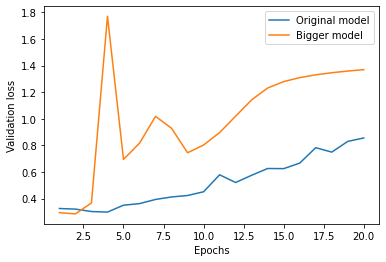

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, label='Original model')
plt.plot(epochs, bigger_model_val_loss, label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

1번째 epoch 이후 거의 바로 과대적합
갈수록 더 심해짐. 
검증 손실도 매우 불안정


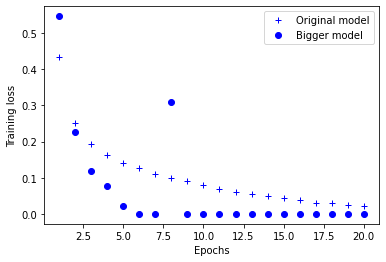

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, label='Original model')
plt.plot(epochs, bigger_model_train_loss, label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## 가중치 규제 추가

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])


L2 규제 페널티의 효과

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 41ms/step - loss: 0.5816 - acc: 0.7384 - val_loss: 0.3746 - val_acc: 0.8828
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3202 - acc: 0.9064 - val_loss: 0.3566 - val_acc: 0.8752
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2621 - acc: 0.9256 - val_loss: 0.3421 - val_acc: 0.8823
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2450 - acc: 0.9315 - val_loss: 0.3345 - val_acc: 0.8870
Epoch 5/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2250 - acc: 0.9429 - val_loss: 0.3478 - val_acc: 0.8820
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2184 - acc: 0.9419 - val_loss: 0.3526 - val_acc: 0.8810
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2181 - acc: 0.9434 - val_loss: 0.3585 - val_acc: 0.8796
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2076 - a

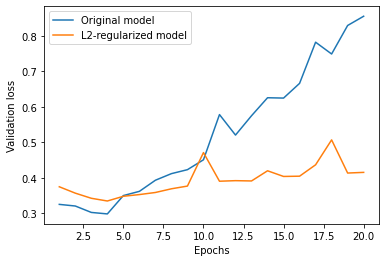

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, label='Original model')
plt.plot(epochs, l2_model_val_loss, label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

L2 규제를 사용한 모델 vs 기본 모델
과대적합에 강건

케라스에서 제공되는 가중치 규제: L1, L2

```python
from keras import regularizers

# L1 규제
regularizers.l1(0.001)

# L1과 L2 규제 병행
regularizers.l1_l2(l1=0.001, l2=0.001)
```

### l1(0.0001) 모델과 비교

In [ ]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 43ms/step - loss: 0.6787 - acc: 0.7407 - val_loss: 0.4830 - val_acc: 0.8441
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.4022 - acc: 0.8887 - val_loss: 0.3815 - val_acc: 0.8856
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3407 - acc: 0.9066 - val_loss: 0.3722 - val_acc: 0.8835
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3231 - acc: 0.9094 - val_loss: 0.3624 - val_acc: 0.8877
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3040 - acc: 0.9155 - val_loss: 0.3633 - val_acc: 0.8850
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3071 - acc: 0.9118 - val_loss: 0.3665 - val_acc: 0.8853
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2881 - acc: 0.9229 - val_loss: 0.3679 - val_acc: 0.8853
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2909 - a

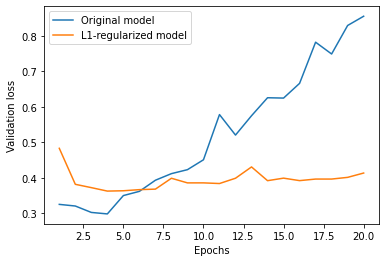

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, label='Original model')
plt.plot(epochs, l1_model_val_loss, label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### l1_l2(l1=0.0001, l2=0.0001)모델과 비교

In [ ]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [ ]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 42ms/step - loss: 0.6705 - acc: 0.7568 - val_loss: 0.4436 - val_acc: 0.8645
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3874 - acc: 0.8946 - val_loss: 0.3752 - val_acc: 0.8872
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3382 - acc: 0.9060 - val_loss: 0.3635 - val_acc: 0.8874
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3150 - acc: 0.9140 - val_loss: 0.3667 - val_acc: 0.8862
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3010 - acc: 0.9185 - val_loss: 0.3966 - val_acc: 0.8730
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2972 - acc: 0.9226 - val_loss: 0.3731 - val_acc: 0.8831
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2906 - acc: 0.9244 - val_loss: 0.3749 - val_acc: 0.8827
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2817 - a

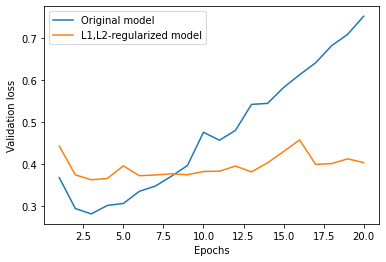

In [ ]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, label='Original model')
plt.plot(epochs, l1l2_model_val_loss, label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## 드롭아웃 추가

```python
model.add(layers.Dropout(0.5))
```

IMDB 네트워크에 두 개의 `Dropout` 층을 추가하고 과대적합을 얼마나 줄여주는지 확인

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 75ms/step - loss: 0.6386 - acc: 0.6136 - val_loss: 0.4502 - val_acc: 0.8608
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.4605 - acc: 0.7956 - val_loss: 0.3431 - val_acc: 0.8796
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3661 - acc: 0.8583 - val_loss: 0.2882 - val_acc: 0.8888
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2981 - acc: 0.8895 - val_loss: 0.2836 - val_acc: 0.8876
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2540 - acc: 0.9103 - val_loss: 0.2833 - val_acc: 0.8868
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2316 - acc: 0.9197 - val_loss: 0.2934 - val_acc: 0.8863
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2027 - acc: 0.9301 - val_loss: 0.3055 - val_acc: 0.8880
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1860 - a

결과 그래프

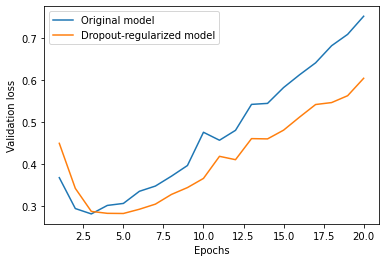

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, label='Original model')
plt.plot(epochs, dpt_model_val_loss, label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()